In [29]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import datetime
%matplotlib inline

<h1><b>Data cleaning,formatting,Feature Engineering

In [30]:
data = pd.read_csv("/home/webwerks/Downloads/assignment_data(1).csv")

# getting age from dob
# some rows had 0000-00-00 dob so removed that from csv 
data['age'] = abs(data['DOB'].astype('datetime64').dt.year-datetime.datetime.today().year)
data

,id,txn,s1,s1_days,s2,s2_days,f1,f1_Dur,f2,f2_values,f3,f4,f5,f6,gender,DOB,age
0,1,21,102,19,59,19,NaN,NaN,13.0,8211.0,5,21,38,13,female,1976-05-19,46
1,2,3,41,16,41,16,2.0,0.0,29.0,5299.0,83,27,158,20,male,1970-05-20,52
2,3,1,33,13,24,13,18.0,248.0,22.0,7881.0,276,15,72,84,female,1981-06-26,41
3,4,1,41,7,29,6,4.0,22.0,10.0,4833.0,14,3,22,1,male,1979-01-13,43
4,5,5,58,18,58,18,1.0,0.0,22.0,9332.0,61,12,15,40,male,1977-12-20,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,837,2,39,2,33,2,NaN,NaN,NaN,NaN,3,2,1,1,male,1983-02-10,39
833,838,1,48,2,26,2,NaN,NaN,NaN,NaN,3,0,1,1,male,1986-11-18,36
834,839,2,28,11,28,11,NaN,NaN,NaN,NaN,0,1,2,0,male,1995-07-11,27
835,840,1,59,8,59,8,NaN,NaN,NaN,NaN,0,1,2,0,male,2001-09-03,21


Convert categorical into no.s like gender

In [31]:
le = preprocessing.LabelEncoder()
le.fit(data['gender'])
data['gender'] = le.transform(data['gender'])
data

,id,txn,s1,s1_days,s2,s2_days,f1,f1_Dur,f2,f2_values,f3,f4,f5,f6,gender,DOB,age
0,1,21,102,19,59,19,NaN,NaN,13.0,8211.0,5,21,38,13,0,1976-05-19,46
1,2,3,41,16,41,16,2.0,0.0,29.0,5299.0,83,27,158,20,1,1970-05-20,52
2,3,1,33,13,24,13,18.0,248.0,22.0,7881.0,276,15,72,84,0,1981-06-26,41
3,4,1,41,7,29,6,4.0,22.0,10.0,4833.0,14,3,22,1,1,1979-01-13,43
4,5,5,58,18,58,18,1.0,0.0,22.0,9332.0,61,12,15,40,1,1977-12-20,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,837,2,39,2,33,2,NaN,NaN,NaN,NaN,3,2,1,1,1,1983-02-10,39
833,838,1,48,2,26,2,NaN,NaN,NaN,NaN,3,0,1,1,1,1986-11-18,36
834,839,2,28,11,28,11,NaN,NaN,NaN,NaN,0,1,2,0,1,1995-07-11,27
835,840,1,59,8,59,8,NaN,NaN,NaN,NaN,0,1,2,0,1,2001-09-03,21


In [32]:
dependent_var = data['txn']
data1 = data.drop(['DOB','id','txn'],axis=1) # since this columns are not needed in process
data1

,s1,s1_days,s2,s2_days,f1,f1_Dur,f2,f2_values,f3,f4,f5,f6,gender,age
0,102,19,59,19,NaN,NaN,13.0,8211.0,5,21,38,13,0,46
1,41,16,41,16,2.0,0.0,29.0,5299.0,83,27,158,20,1,52
2,33,13,24,13,18.0,248.0,22.0,7881.0,276,15,72,84,0,41
3,41,7,29,6,4.0,22.0,10.0,4833.0,14,3,22,1,1,43
4,58,18,58,18,1.0,0.0,22.0,9332.0,61,12,15,40,1,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,39,2,33,2,NaN,NaN,NaN,NaN,3,2,1,1,1,39
833,48,2,26,2,NaN,NaN,NaN,NaN,3,0,1,1,1,36
834,28,11,28,11,NaN,NaN,NaN,NaN,0,1,2,0,1,27
835,59,8,59,8,NaN,NaN,NaN,NaN,0,1,2,0,1,21


<h2><b>Replace outliers with 10th percentile and 90th percentile

In [33]:
# option we have for now
# we can remove rows, we can replace NaN with 0, replace NaN with mean/median
# we can use advance algos like K-mean or such clustering algos to get value for NaN
# for study purpose we can move with mean value replacement 
column_means = data1.mean()
data1 =data1.fillna(column_means)
data1['txn']= dependent_var
data1

,s1,s1_days,s2,s2_days,f1,f1_Dur,f2,f2_values,f3,f4,f5,f6,gender,age,txn
0,102,19,59,19,31.248841,277.268934,13.000000,8211.000000,5,21,38,13,0,46,21
1,41,16,41,16,2.000000,0.000000,29.000000,5299.000000,83,27,158,20,1,52,3
2,33,13,24,13,18.000000,248.000000,22.000000,7881.000000,276,15,72,84,0,41,1
3,41,7,29,6,4.000000,22.000000,10.000000,4833.000000,14,3,22,1,1,43,1
4,58,18,58,18,1.000000,0.000000,22.000000,9332.000000,61,12,15,40,1,45,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,39,2,33,2,31.248841,277.268934,21.526003,8224.049034,3,2,1,1,1,39,2
833,48,2,26,2,31.248841,277.268934,21.526003,8224.049034,3,0,1,1,1,36,1
834,28,11,28,11,31.248841,277.268934,21.526003,8224.049034,0,1,2,0,1,27,2
835,59,8,59,8,31.248841,277.268934,21.526003,8224.049034,0,1,2,0,1,21,1


<AxesSubplot:>

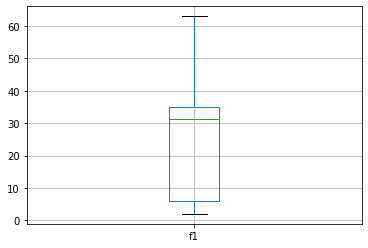

In [34]:
down_quantiles = data1.quantile(0.10)
up_quantiles = data1.quantile(0.90)
outliers_low = (data1 < down_quantiles)
outliers_up= (data1 > up_quantiles)
data3= data1.mask(outliers_low, down_quantiles, axis=1)
data1= data3.mask(outliers_up, up_quantiles, axis=1)
data1.boxplot('f1')

In [35]:
# Get null values of each column
data1.isna().sum()

s1           0
s1_days      0
s2           0
s2_days      0
f1           0
f1_Dur       0
f2           0
f2_values    0
f3           0
f4           0
f5           0
f6           0
gender       0
age          0
txn          0
dtype: int64

Column f1,f1_dur,f2,f2_values is approximately 1/4 null

Correlation of this column with depended feature is low

<h1><b>EDA

<AxesSubplot:>

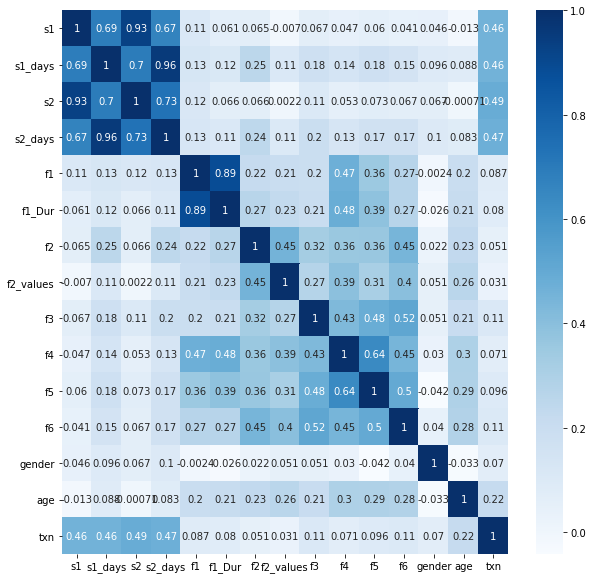

In [36]:
# Get correlation metrix
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(),cbar=True,annot=True,cmap='Blues')

As above metrix s1,s1_days,s2_days,s2,age is mostly releated with txn
f3,f4,f5,f6 are loosly related with txn

However s1,s1_days, s2,s2_days are closely releated each other as well

Q1-How does date of birth or age affect txn -transactions?

<AxesSubplot:xlabel='age'>

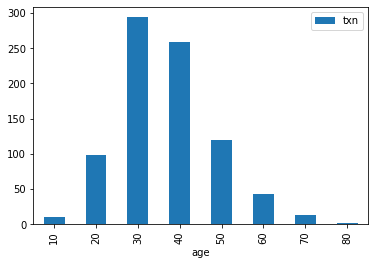

In [37]:
data[['txn']].groupby((data["age"]//10)*10).count().plot(kind="bar")

Age between 20-50 are more likely to do transactions

Q2-How gender affect transactions?

<AxesSubplot:xlabel='gender'>

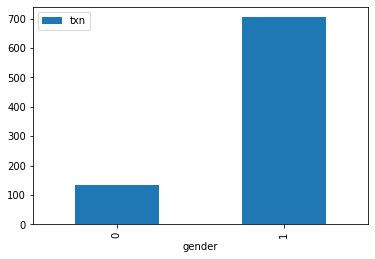

In [38]:
data[['txn']].groupby(data['gender']).count().plot(kind="bar")

from this graph we can say female are less likely to do transaction than male
But in our data ratio of male and female is significantly low,so above statement does not have high confidence.

how feature1 affect transactions?

<AxesSubplot:xlabel='f3'>

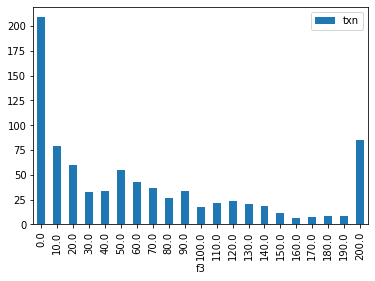

In [39]:
data1[['txn']].groupby((data1['f3']//10)*10).count().plot(kind="bar") # scaled data for visualization

This Shows that as f1 value increases,no of transaction get lows
Except that of values we replace with mean at 6.0

How does s1 affect transactions?

<AxesSubplot:xlabel='s1'>

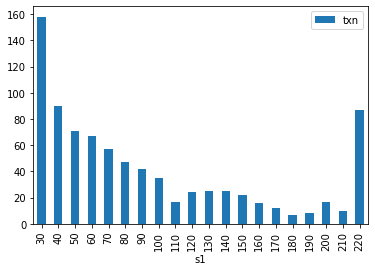

In [40]:
data1[['txn']].groupby((data1['s1']//10)*10).count().plot(kind="bar") # scaled data for visualization

<b>Normalizing the data for predictive modeling

In [42]:
scaler = preprocessing.MinMaxScaler()
data2 = data1.copy()

scaler.fit(data2.iloc[:,:-1])
data2.iloc[:,:-1]  = scaler.transform(data2.iloc[:,:-1])
data2

,s1,s1_days,s2,s2_days,f1,f1_Dur,f2,f2_values,f3,f4,f5,f6,gender,age,txn
0,0.365079,0.555556,0.189718,0.578947,0.479489,0.440761,0.058824,0.503036,0.019782,0.323077,0.330357,0.070997,0.0,0.620690,8
1,0.042328,0.388889,0.079559,0.421053,0.000000,0.000000,1.000000,0.225908,0.405539,0.415385,1.000000,0.123867,1.0,0.827586,3
2,0.000000,0.222222,0.000000,0.263158,0.262295,0.394065,0.588235,0.471631,1.000000,0.230769,0.633929,0.607251,0.0,0.448276,1
3,0.042328,0.000000,0.006120,0.000000,0.032787,0.033504,0.000000,0.181560,0.064293,0.046154,0.187500,0.000000,1.0,0.517241,1
4,0.132275,0.500000,0.183599,0.526316,0.000000,0.000000,0.588235,0.609718,0.296736,0.184615,0.125000,0.274924,1.0,0.586207,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,0.031746,0.000000,0.030600,0.000000,0.479489,0.440761,0.560353,0.504278,0.009891,0.030769,0.000000,0.000000,1.0,0.379310,2
833,0.079365,0.000000,0.000000,0.000000,0.479489,0.440761,0.560353,0.504278,0.009891,0.000000,0.000000,0.000000,1.0,0.275862,1
834,0.000000,0.111111,0.000000,0.157895,0.479489,0.440761,0.560353,0.504278,0.000000,0.015385,0.008929,0.000000,1.0,0.000000,2
835,0.137566,0.000000,0.189718,0.000000,0.479489,0.440761,0.560353,0.504278,0.000000,0.015385,0.008929,0.000000,1.0,0.000000,1
